In [53]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import neurokit2 as nk

In [7]:
df = pd.read_csv('../data/1222325cFnorm.csv')
loc = pd.read_csv('../data/1222325clocation_Bites.csv')

df

,MR,ML,SU,Microphone,Eye,ECG,Pressure Sensor,Unnamed: 7
0,-0.002355,-0.052066,-0.002789,0.021630,-0.004176,0.015600,NaN,NaN
1,-0.025637,-0.566710,-0.030342,0.021635,-0.004162,0.015578,NaN,NaN
2,-0.125210,-2.767900,-0.148140,0.021643,-0.004146,0.015573,NaN,NaN
3,-0.358610,-7.927500,-0.424090,0.021636,-0.004137,0.015608,NaN,NaN
4,-0.657010,-14.524000,-0.776490,0.021626,-0.004148,0.015637,NaN,NaN
...,...,...,...,...,...,...,...,...
3230876,0.800180,5.769900,-1.260500,-0.000544,0.000101,0.094466,NaN,NaN
3230877,0.812110,5.791300,-1.282900,-0.000520,0.000123,0.098004,NaN,NaN
3230878,0.914530,5.964000,-1.442200,-0.000525,0.000086,0.093946,NaN,NaN
3230879,1.027600,6.452600,-1.610700,-0.000561,0.000023,0.084736,NaN,NaN


In [8]:
print(f"Signal duration: {datetime.timedelta(seconds=len(df.index)/2000)}")

Signal duration: 0:26:55.440500


## Visualize signals for the whole night

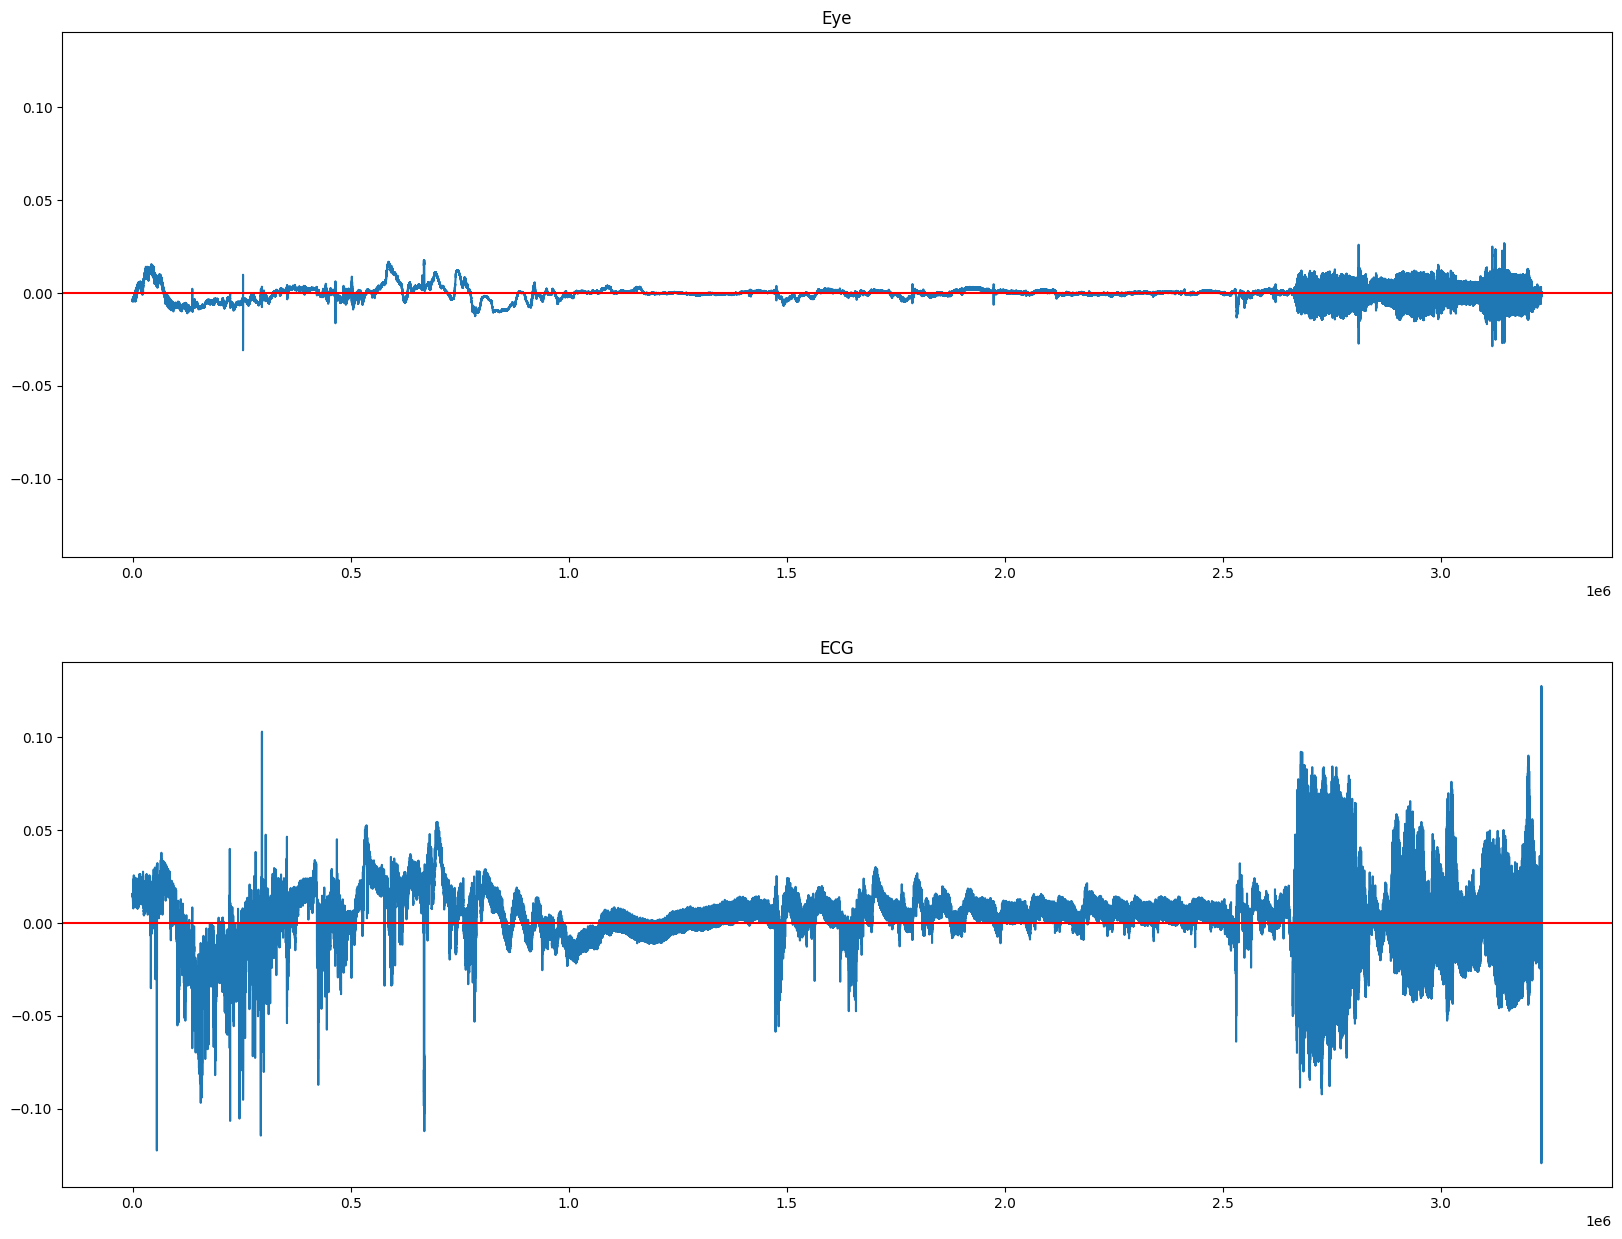

In [26]:
range_min = 0
range_max = df.index[-1]

eog_ecg = df[["Eye","ECG"]]


def plot_data(data, loc):    
    fig, axes = plt.subplots(2,1, figsize=(20, 15), sharey=True) # ensures that all subplots share the same x-axis and y-axis
    for i in range(2):
        axes[i].plot(data.iloc[range_min:range_max,i])
        axes[i].set_title(data.columns[i])

        axes[i].axhline(y=0, color='r', linestyle='-')


        #for j in range(loc.shape[0]):
        #    axes[i].axvline(x=loc.iloc[j,0], color='g', linestyle='--')
        #    axes[i].axvline(x=loc.iloc[j,1], color='y', linestyle='--')
        
plot_data(eog_ecg, loc)

## Try out Neurokit2 visualizations and down-sampling

In [48]:
ecg = df["ECG"].values.tolist()
eog = df["Eye"].values.tolist()


ecg_signals, ecg_info = nk.ecg_process(ecg_signal=ecg, sampling_rate=2000)
eog_signals, eog_info = nk.eog_process(veog_signal=eog, sampling_rate=2000)

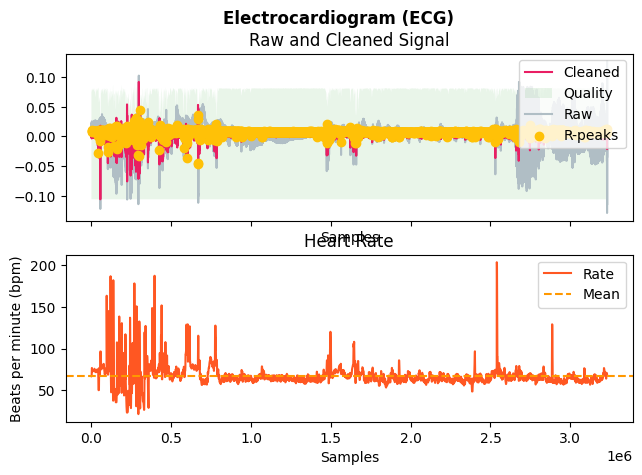

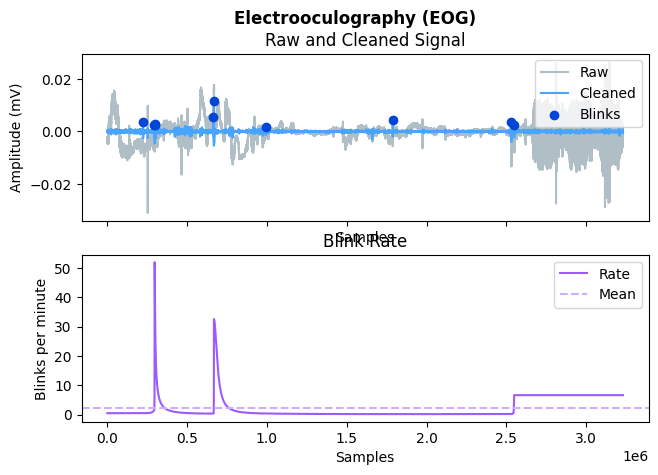

In [49]:
nk.ecg_plot(ecg_signals)

nk.eog_plot(eog_signals)

Number of data before downsampling: 3230881
Number of data after downsampling: 1615440


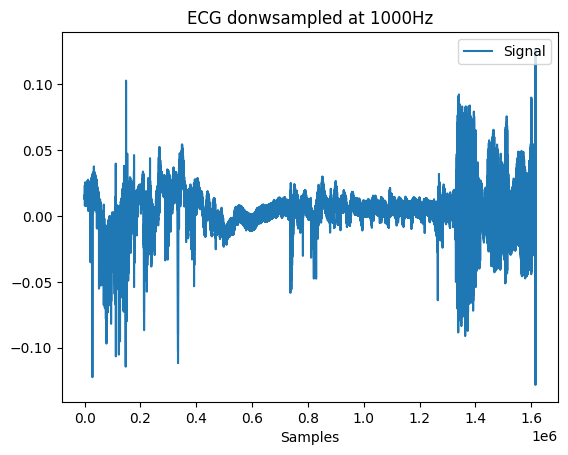

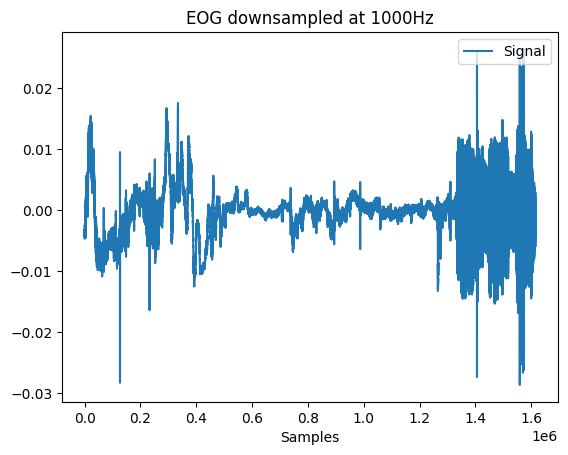

In [52]:
# Downsample ECG and EOG signal
ecg_ds = nk.signal_resample(ecg, sampling_rate=2000, desired_sampling_rate=1000)
eog_ds = nk.signal_resample(eog, sampling_rate=2000, desired_sampling_rate=1000)


nk.signal_plot(ecg_ds, title="ECG donwsampled at 1000Hz")
nk.signal_plot(eog_ds, title="EOG downsampled at 1000Hz")

print(f"Number of data before downsampling: {len(ecg)}")
print(f"Number of data after downsampling: {len(ecg_ds)}")

## Detect sleep stages

In [ ]:
##TODO: find suitable method to detect sleep stage. As of now we have no labelled data that could help us with the classification.